## Neutron Star Mergers project

## Overview
**Notebook Author:** Topollo Naketsana (University of the Western Cape)<br>

**Paper:** [here]()

### Background:

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
# load data
data = pd.read_csv('../data/Parametrized_data.dat')

In [19]:
data

,m1_source_frame_Msun,m2_source_frame_Msun,Lambda1,Lambda2,Radius1_km,Radius2_km
0,1.637296,1.140765,66.373870,723.523060,10.887391,11.097352
1,1.612825,1.156845,191.207304,1335.339873,12.402063,12.349246
2,1.563015,1.191614,200.526550,1156.272842,12.285450,12.501216
3,1.625307,1.148567,134.833116,1439.597356,12.141489,12.627265
4,1.625909,1.148243,177.099466,1428.281697,12.399686,12.426146
...,...,...,...,...,...,...
2391,1.456157,1.275411,271.138172,593.167994,11.771023,11.732749
2392,1.363036,1.361102,275.144868,277.559025,11.146219,11.146212
2393,1.547311,1.202998,308.382837,1352.958123,12.800400,12.770993
2394,1.379074,1.345569,253.244553,293.279550,11.077769,11.070750


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m1_source_frame_Msun  2396 non-null   float64
 1   m2_source_frame_Msun  2396 non-null   float64
 2   Lambda1               2396 non-null   float64
 3   Lambda2               2396 non-null   float64
 4   Radius1_km            2396 non-null   float64
 5   Radius2_km            2396 non-null   float64
dtypes: float64(6)
memory usage: 112.4 KB


In [11]:
# shape
data.shape

(2396, 6)

In [ ]:
(2396, 6)

In [15]:
# the missing values
data.isna().mean()

m1_source_frame_Msun    0.0
m2_source_frame_Msun    0.0
Lambda1                 0.0
Lambda2                 0.0
Radius1_km              0.0
Radius2_km              0.0
dtype: float64

In [23]:
# define m1 and m2 as well as their radii
M1 = data['m1_source_frame_Msun']
M2 = data['m2_source_frame_Msun']

# radii
R1 = data['Radius1_km']
R2 = data['Radius2_km']

Text(0.5, 0, 'Mass (solar masses)')

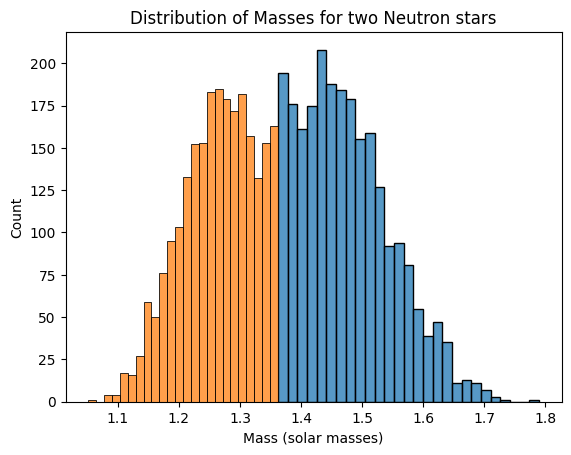

In [33]:
# plot the distribution of massess
sns.histplot(M1)
sns.histplot(M2)

plt.title('Distribution of Masses for two Neutron stars')
plt.xlabel('Mass (solar masses)')

Text(0.5, 0, 'Radius (km)')

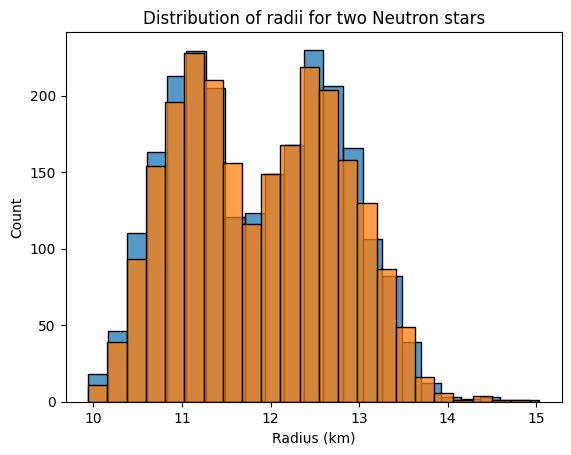

In [34]:
# plot the distribution of radii
sns.histplot(R1)
sns.histplot(R2)

plt.title('Distribution of radii for two Neutron stars')
plt.xlabel('Radius (km)')

## Background

### Orbital Frequency vs Mass and Radius

The orbital frequency \( f \) of a binary neutron star system can be related to the total mass \( M = M_1 + M_2 \) and the orbital separation \( r \) as:

$$
f = \frac{1}{2\pi} \sqrt{ \frac{G M}{r^3} }
$$

This equation is derived from Kepler's third law and Newtonian gravity, assuming a circular orbit. It allows us to explore how frequency changes with varying mass and orbital radius, as shown in the following plot.


Separation = 98.0 km


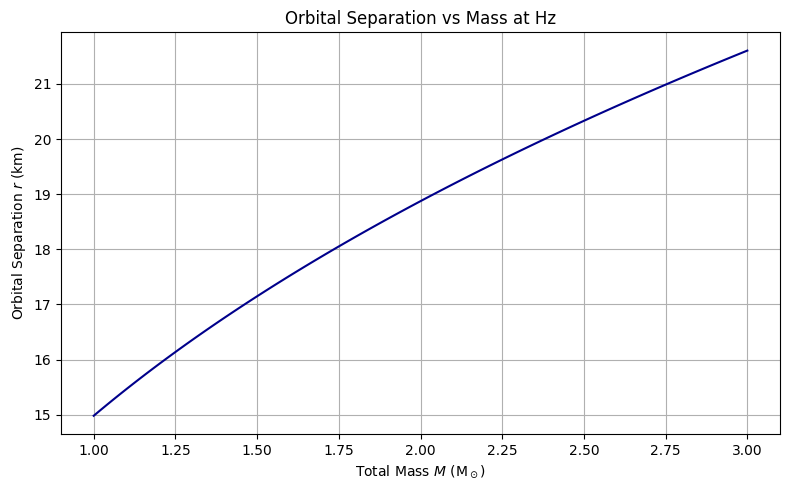

In [41]:
f = 1000
G = 6.67430e-11
M_sun = 1.98847e30
M_total = np.array(M1 + M2)
R_km = 1e3

# function
separation_r = lambda M_total, f: (
    (G * (M_total * M_sun) / (2 * np.pi * f)**2) ** (1/3) / R_km)

r_km = separation_r(2.8, 100)               # 2.8 M☉ binary at 100 Hz
print(f"Separation = {r_km:.1f} km")

# total mass range in solar masses
M_range = np.linspace(1.0, 3.0, 100)

# Compute separations
r_range = np.array([separation_r(M, f) for M in M_range])

# Plotting
plt.figure(figsize= (8, 5))
plt.plot(M_range, r_range, color= 'darkblue')
plt.title(f"Orbital Separation vs Mass at Hz")
plt.xlabel("Total Mass $M$ (M$_\\odot$)")
plt.ylabel("Orbital Separation $r$ (km)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Equation of State (EoS) + General relativity

We assume a **polytropic equation of state**:

$
P = K \rho^\gamma
$

where:
- P  is the pressure
- $\rho$  is the energy density
- \( K \) is the polytropic constant
- \( $\gamma$ \) is the adiabatic index (e.g. \( $\gamma$ = 2 \))

From this, we can also invert:


$\rho = \left( \frac{P}{K} \right)^{1/\gamma}
$
